In [1]:
# Import necessary libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Create the SQLite database or this will connect to the database if already exists
conn = sqlite3.connect("Sales_data.db")
cursor = conn.cursor()

In [3]:
# Create the sales table
cursor.execute("""
create table if not exists sales (
id integer primary key autoincrement,
product text,
quantity integer,
price real
)
""")

In [4]:
# Insert sample sales data
sample_data = [
    ("Apples", 10, 2.5),
    ("Bananas", 5, 1.0),
    ("Oranges", 8, 1.8),
    ("Apples", 7, 2.5),
    ("Bananas", 10, 1.0),
    ("Oranges", 4, 1.8)
]
cursor.executemany("Insert into sales (product, quantity, price) values (?, ?, ?)", sample_data)
conn.commit()

In [5]:
# Query to get total quantity and total revenue per product
query = """
select product, sum(quantity) as total_quantity, sum(price) as revenue
from sales
group by product
"""

In [6]:
# Load the result into a Pandas DataFrame
df = pd.read_sql_query(query, conn)

In [7]:
# Print the results 
print("Sales Summary:\n")
print(df)

Sales Summary:

   product  total_quantity  revenue
0   Apples              34     10.0
1  Bananas              30      4.0
2  Oranges              24      7.2


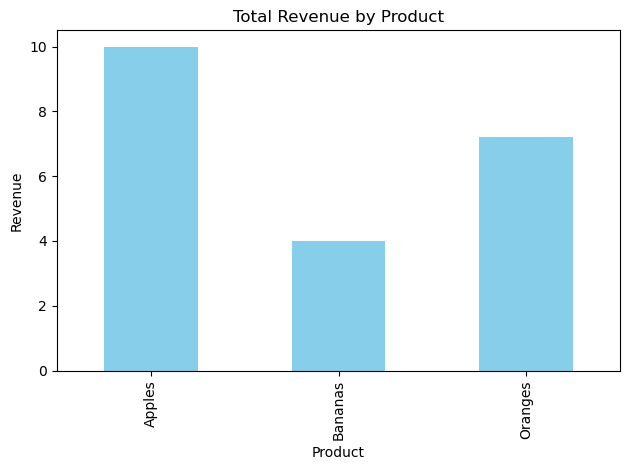

In [8]:
# Plot Revenue per product using a bar chart
df.plot(kind = 'bar', x = 'product', y = 'revenue', color = 'skyblue', legend = False)
plt.title("Total Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("sales_chart.png")       #Save the plot as an image
plt.show()

# Close the connection
conn.close()